In [8]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
import numpy as np

In [10]:
original_dataset_dir = './original_data'
base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


In [ ]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [5]:

os.mkdir(train_cats_dir)

os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
[1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]


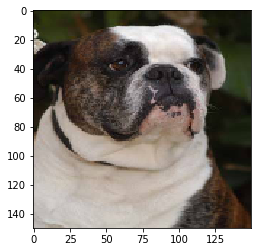

In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    plt.imshow(data_batch[1])
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch)
    break

In [9]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 66s 656ms/step - loss: 0.6924 - acc: 0.5270 - val_loss: 0.6757 - val_acc: 0.5930
Epoch 2/30
100/100 [==============================] - 58s 584ms/step - loss: 0.6559 - acc: 0.6235 - val_loss: 0.6351 - val_acc: 0.6480
Epoch 3/30
100/100 [==============================] - 59s 590ms/step - loss: 0.6010 - acc: 0.6630 - val_loss: 0.6301 - val_acc: 0.6280
Epoch 4/30
100/100 [==============================] - 60s 597ms/step - loss: 0.5580 - acc: 0.7110 - val_loss: 0.5915 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 58s 579ms/step - loss: 0.5276 - acc: 0.7325 - val_loss: 0.5903 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 58s 584ms/step - loss: 0.5009 - acc: 0.7565 - val_loss: 0.5921 - val_acc: 0.6760
Epoch 7/30
100/100 [=

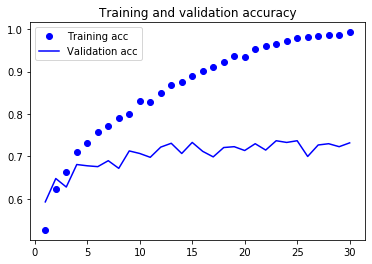

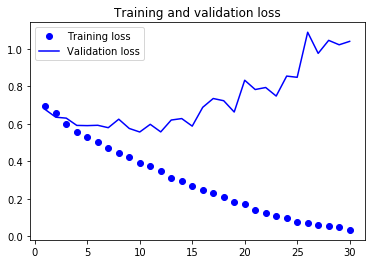

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [5]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [23]:
for layer in conv_base.layers:
#     print(layer.name, layer.trainable)
    if layer.name == 'input_1':
        layer.trainable = False

In [24]:
for layer in conv_base.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


Directory:  ./cats_and_dogs_small\train
Found 2000 images belonging to 2 classes.


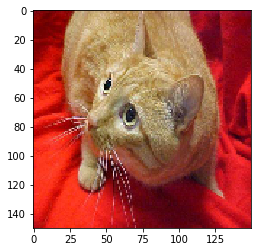

[0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.]
Directory:  ./cats_and_dogs_small\validation
Found 1000 images belonging to 2 classes.


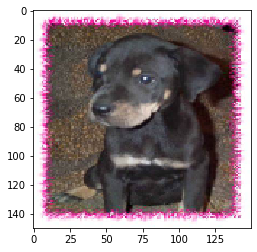

[1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.]
Directory:  ./cats_and_dogs_small\test
Found 1000 images belonging to 2 classes.


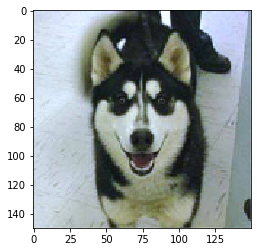

[1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]


In [27]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    print('Directory: ', directory)
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        if(i == 0):
            plt.imshow(inputs_batch[0]);
            plt.show();
            print(labels_batch)
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

In [12]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [14]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.6201 - acc: 0.6580 - val_loss: 0.4429 - val_acc: 0.8260
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/sample - loss: 0.4429 - acc: 0.7880 - val_loss: 0.3577 - val_acc: 0.8530
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/sample - loss: 0.3558 - acc: 0.8530 - val_loss: 0.3136 - val_acc: 0.8780
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/sample - loss: 0.3108 - acc: 0.8750 - val_loss: 0.2915 - val_acc: 0.8800
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/sample - loss: 0.2910 - acc: 0.8790 - val_loss: 0.2792 - val_acc: 0.8810
Epoch 6/30
2000/2000 [==============================] - 3s 1ms/sample - loss: 0.2645 - acc: 0.9045 - val_loss: 0.2728 - val_acc: 0.8800
Epoch 7/30
2000/2000 [==============================] - 3s 1ms/sample - loss: 0.2413 - acc: 0.9025 - val_loss: 0.2626 - val_acc: 0.8890


In [16]:
test_result = model.predict(test_features)

In [17]:
test_result.shape

(1000, 1)

In [28]:
test_result

array([[8.18546772e-01],
       [1.02773821e-02],
       [8.61476898e-01],
       [3.43059619e-05],
       [2.14466807e-02],
       [9.98788774e-01],
       [3.40731531e-01],
       [1.38460889e-01],
       [9.95598257e-01],
       [1.79830194e-02],
       [1.82010047e-02],
       [9.99827981e-01],
       [9.50668216e-01],
       [4.05839682e-02],
       [6.03938848e-02],
       [1.24911210e-04],
       [9.83076453e-01],
       [4.91463859e-03],
       [1.18191265e-01],
       [9.87927854e-01],
       [8.08358043e-02],
       [7.01714337e-01],
       [9.99747574e-01],
       [6.08106181e-02],
       [9.95717824e-01],
       [8.63875628e-01],
       [2.17676479e-02],
       [9.50758811e-03],
       [9.99806821e-01],
       [5.23739994e-01],
       [2.30102718e-01],
       [8.41526501e-03],
       [9.30007458e-01],
       [9.99882936e-01],
       [9.63385820e-01],
       [9.97557521e-01],
       [9.99899387e-01],
       [1.19195312e-04],
       [1.24521010e-01],
       [9.64415312e-01],


In [18]:
test_result

array([[8.18546772e-01],
       [1.02773821e-02],
       [8.61476898e-01],
       [3.43059619e-05],
       [2.14466807e-02],
       [9.98788774e-01],
       [3.40731531e-01],
       [1.38460889e-01],
       [9.95598257e-01],
       [1.79830194e-02],
       [1.82010047e-02],
       [9.99827981e-01],
       [9.50668216e-01],
       [4.05839682e-02],
       [6.03938848e-02],
       [1.24911210e-04],
       [9.83076453e-01],
       [4.91463859e-03],
       [1.18191265e-01],
       [9.87927854e-01],
       [8.08358043e-02],
       [7.01714337e-01],
       [9.99747574e-01],
       [6.08106181e-02],
       [9.95717824e-01],
       [8.63875628e-01],
       [2.17676479e-02],
       [9.50758811e-03],
       [9.99806821e-01],
       [5.23739994e-01],
       [2.30102718e-01],
       [8.41526501e-03],
       [9.30007458e-01],
       [9.99882936e-01],
       [9.63385820e-01],
       [9.97557521e-01],
       [9.99899387e-01],
       [1.19195312e-04],
       [1.24521010e-01],
       [9.64415312e-01],


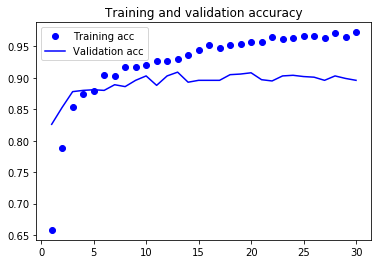

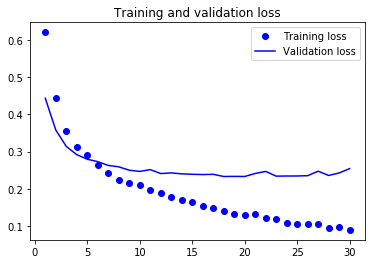

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()